Copyright (c) 2025, John Meshreki

All rights reserved.

john.meshreki@gmail.com


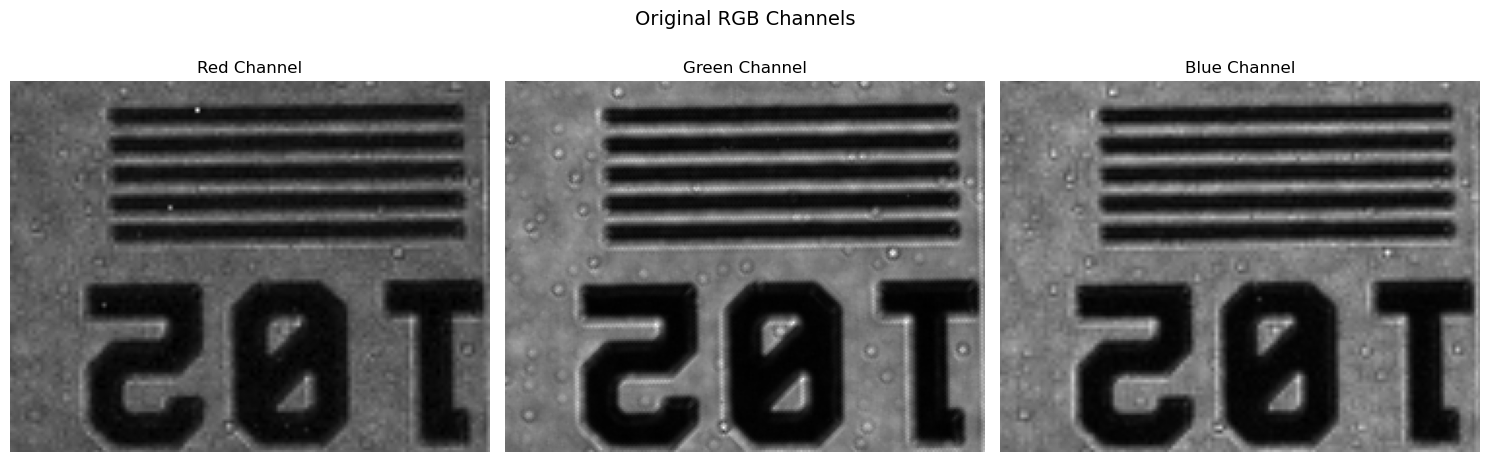

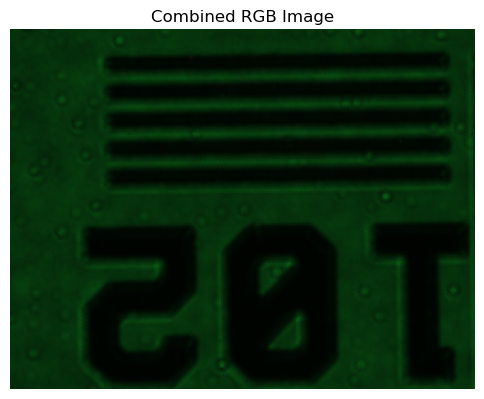

Metadata for 2024_02_02_17_04_20_img_iso_1600_shutter_1_x_16_y_16_r_0_g_1_b_0.cr2:

ExifTool Version Number         : 12.40
File Name                       : 2024_02_02_17_04_20_img_iso_1600_shutter_1_x_16_y_16_r_0_g_1_b_0.cr2
Directory                       : .
File Size                       : 29 MiB
File Modification Date/Time     : 2025:02:02 15:44:57+01:00
File Access Date/Time           : 2025:02:02 15:44:57+01:00
File Inode Change Date/Time     : 2025:02:02 15:44:57+01:00
File Permissions                : -rwxr-xr-x
File Type                       : CR2
File Type Extension             : cr2
MIME Type                       : image/x-canon-cr2
Exif Byte Order                 : Little-endian (Intel, II)
Image Width                     : 5616
Image Height                    : 3744
Bits Per Sample                 : 8 8 8
Compression                     : JPEG (old-style)
Make                            : Canon
Camera Model Name               : Canon EOS 5D Mark II
Preview Image Start

In [9]:
import os
import numpy as np
import OpenEXR
import Imath
import cv2
import matplotlib.pyplot as plt
import subprocess

def print_metadata_exiftool(file_path):
    """
    Prints metadata of an image file using ExifTool.

    Parameters:
    - file_path: Path to the image file (EXR, JPEG, PNG, etc.).
    """
    try:
        # Run ExifTool command
        result = subprocess.run(["exiftool", file_path], capture_output=True, text=True, check=True)
        
        # Print the metadata
        print(f"Metadata for {file_path}:\n")
        print(result.stdout)
    
    except FileNotFoundError:
        print("Error: ExifTool is not installed or not found in PATH.")
    except subprocess.CalledProcessError as e:
        print(f"Error reading metadata: {e}")


def plot_rgb_channels(R, G, B, title="Original RGB Channels"):
    """
    Plots the R, G, and B channels of an image in separate subplots.
    """
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    
    axs[0].imshow(R, cmap='gray')
    axs[0].set_title('Red Channel')
    axs[0].axis('off')

    axs[1].imshow(G, cmap='gray')
    axs[1].set_title('Green Channel')
    axs[1].axis('off')

    axs[2].imshow(B, cmap='gray')
    axs[2].set_title('Blue Channel')
    axs[2].axis('off')

    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()



def load_exr(file_path):
    """
    Loads an EXR image and extracts the R, G, and B channels.
    """
    exr_file = OpenEXR.InputFile(file_path)
    
    dw = exr_file.header()['dataWindow']
    size = (dw.max.x - dw.min.x + 1, dw.max.y - dw.min.y + 1)

    FLOAT = Imath.PixelType(Imath.PixelType.FLOAT)
    
    channels = {c: np.frombuffer(exr_file.channel(c, FLOAT), dtype=np.float32).reshape(size[1], size[0]) for c in ("R", "G", "B")}
    
    return channels["R"], channels["G"], channels["B"], size


def print_exr_metadata(file_path):
    """
    Prints the metadata from an EXR file.
    """
    exr = OpenEXR.InputFile(file_path)
    header = exr.header()
    print(f"Metadata for {file_path}:\n")
    for field, value in header.items():
        print(f"{field}: {value}")


# File Path
img_path = "2024_02_05_09_06_54_img_x_16_y_16_r_0_g_1_b_0_cropped.exr"

# Load EXR image
R, G, B, size = load_exr(img_path)

# Plot the RGB channels individually
plot_rgb_channels(R, G, B)

# Merge R, G, B into a single image
rgb_image = cv2.merge([B, G, R])  # OpenCV uses BGR format

# Plot the image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.axis("off")
plt.title("Combined RGB Image")
plt.show()

metadata = "full"  # "short" or "full"a

if metadata == "short":
    # Print (short) metadata with OpexEXR
    print_exr_metadata(img_path)
else:
    # Print (full) metadata with EXIFTOOL
    print_metadata_exiftool("2024_02_02_17_04_20_img_iso_1600_shutter_1_x_16_y_16_r_0_g_1_b_0.cr2")


